## Objective: analyze dataset to determine a standard size

In [1]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

data_path = 'images/'

In [2]:
df = []
for breed in os.listdir(data_path):
    for dog in os.listdir(data_path + breed):
        img = cv2.imread(data_path + breed + '/' + dog)
        df.append((img.shape[0], img.shape[1], img.shape[0] / img.shape[1]))
df = pd.DataFrame(df, columns=['Height', 'Width', 'Ratio'])

In [3]:
n_breeds = len(os.listdir(data_path))
n_images = df.shape[0]
print(f'Dataset contains {n_breeds} breeds and a total of {n_images} images.')

Dataset contains 120 breeds and a total of 20580 images.


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,20580.0,385.861224,124.863446,100.00000,333.000000,375.00,453.000000,2562.000000
Width,20580.0,442.531876,142.792308,97.00000,361.000000,500.00,500.000000,3264.000000
Ratio,20580.0,0.912368,0.287046,0.27521,0.747826,0.75,1.079914,2.540816


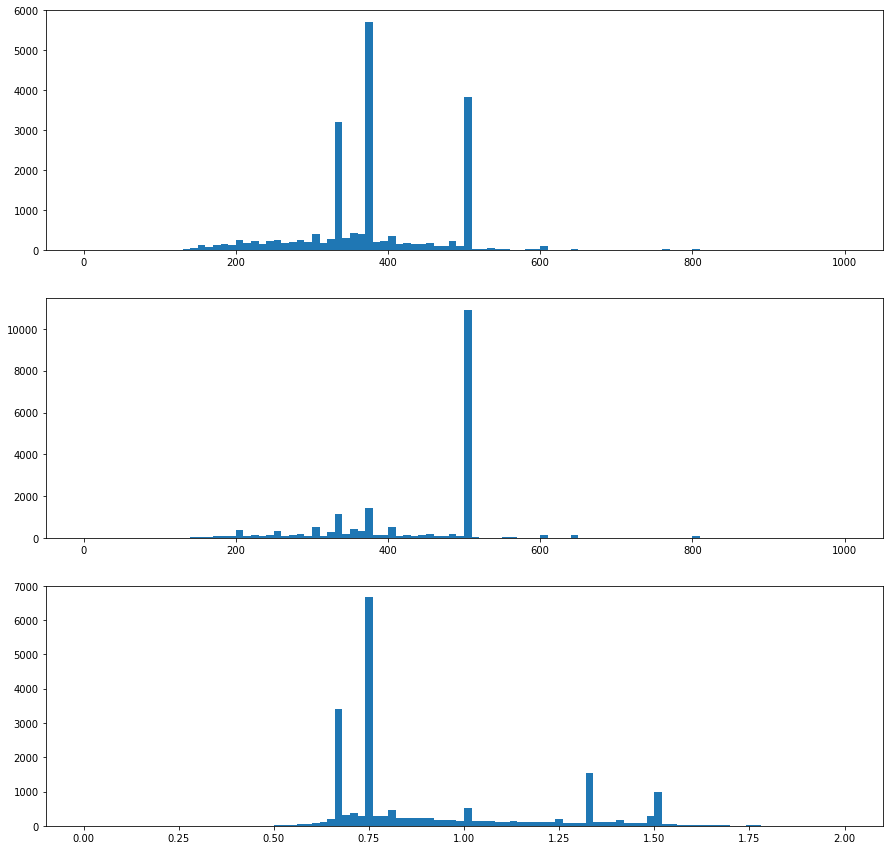

In [15]:
f = plt.figure(figsize=(15, 15)) 

plt.subplot(311)
plt.hist(df['Height'], bins=100, range=(0, 1000))
plt.subplot(312)
plt.hist(df['Width'], bins=100, range=(0, 1000))
plt.subplot(313)
plt.hist(df['Ratio'], bins=100, range=(0, 2))

plt.show()

#### Most common dimension seems to be 500x375 (ratio 0.75)